In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/ncodes.csv', names=('firstup', 'ncode', 'noveltype', 'point', 'length', 'title'))

In [3]:
# print(df)
# print(df.dtypes)
print(df.head())
print(df.shape)

               firstup   ncode  noveltype  point  length  \
0  2004-04-20 01:51:31  N0037A          1    321    1845   
1  2004-05-02 01:40:21  N0052A          2    162   13570   
2  2004-05-20 15:36:40  N0078A          1     24    6743   
3  2004-05-20 17:11:21  N0080A          1     54    6901   
4  2004-05-20 17:26:37  N0081A          1     26    7801   

                      title  
0  総合調査会社アジディックファイル１ジャッジメント  
1                 傲慢なる少年の傀儡  
2                      一人旅。  
3                 軍（いくさ）神の剣  
4         North　Land　Storen  
(854296, 6)


In [4]:
print(df.point)
# print(df[780273:780275])
# print(df[['ncode', 'title']])
# print(df.iloc[:, [0, 2]])

0         321
1         162
2          24
3          54
4          26
         ... 
854291      0
854292      0
854293      0
854294      0
854295      0
Name: point, Length: 854296, dtype: int64


In [5]:
df_s = df.sort_values('length', ascending=False)
print(df_s[0:10])

                    firstup    ncode  noveltype   point    length  \
365142  2016-12-16 18:27:23  N7234DR          1    1811  25123102   
150873  2013-08-19 20:37:46  N3726BT          1  342230  15770596   
342651  2016-08-28 21:32:34  N6136DM          1    1010  15286984   
43518   2010-06-06 16:15:20   N8313L          1   20905  14907144   
238504  2015-03-13 03:43:15  N5534CO          1   28950  13579236   
159563  2013-10-26 19:45:19  N4908BV          1  168241  12813407   
203844  2014-08-19 18:31:55  N3125CG          1  172296  11062203   
494033  2018-06-06 21:12:11  N6147EU          1   15324  10640667   
215638  2014-11-03 00:26:04  N1776CJ          1    3838  10411308   
186298  2014-04-30 23:36:42  N9985CB          1  210965   9218553   

                                    title  
365142        小説家になろう総合日間ランキングイン・ランキングアウト  
150873                              レジェンド  
342651                   その刀を下ろして、帯刀男子さま！  
43518                 武装召喚師――黒き矛と異世界の勇者――  
238504  影の勇者の再冒険　～～R

In [6]:
pd.options.display.max_colwidth = 50
df['title_len'] = df['title'].str.len()
df_s_title_len = df.sort_values(by='title', key=lambda x: x.str.len(), ascending=False)
print(df_s_title_len[0:1000][['title_len', 'title']])

        title_len                                              title
735441      100.0  大魔王を倒したっていうのに、なんでカインは帰ってこないのよ！？　別れる時に、「大魔王を倒した...
786718      100.0  旅の聖女ですが、王侯貴族に騙され呪いの儀式の生け贄にされたらなぜか不死になって最強に　〜実は...
687237      100.0  勇者パーティーを追放された召喚士だけど、召喚獣リストが壊れて攻撃力630万とか謎なのが色々リ...
185009      100.0  「ホウレンソウと同じ科に属してるらしくて、そう考えると、今にも撃ち合いが始まるシリアスな決闘...
686663      100.0  前世でもアインシュタイン級の天才だった俺が転生ボーナスで「賢者」と「剣聖」スキルをもらって最...
...           ...                                                ...
736111       96.0  食べられる魔法？！～神に愛された寵児だと勝手に持ち上げたくせに、初級魔法しか使えない無能だと...
780962       96.0  究極の治癒を手にした天才治癒師が攻撃力皆無だからと追放されたので、闇落ちしてヒール（悪役）の...
838420       96.0  公爵令嬢様、あなたの身代わりになって婚約破棄されたので、代わりに悪事を全部バラしてもいいです...
805760       96.0  異世界プリンス物語　～チートスキルを受け継いだ王子の俺が自由な生活を求めて一人暮らしを始めた...
814921       96.0  三つ編みの、女の子だよ、目の前に。　～そんな川柳のような状況下で、盛大に見せられるもの。それ...

[1000 rows x 2 columns]


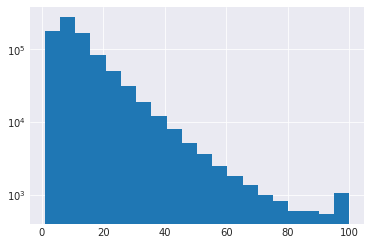

In [7]:
# print(plt.style.available)
plt.style.use('seaborn-darkgrid')
# ax = df.point.hist(bins=20, range=(0,df.point.max()), log=True)
ax = df.title_len.hist(bins=20, log=True)
plt.show()

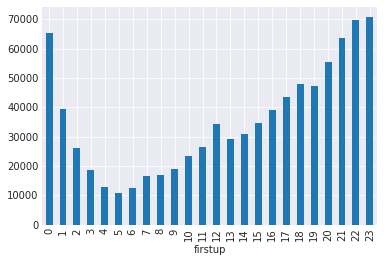

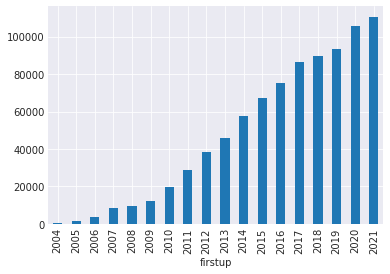

In [8]:
df.firstup = df.firstup.astype('datetime64')
df.groupby([df.firstup.dt.hour]).firstup.count().plot(kind='bar')
plt.show()
df.groupby([df.firstup.dt.year]).firstup.count().plot(kind='bar')
plt.show()